<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023/blob/main/Python/Python_Machine/Machine_Learning_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# クラスタリングー知識編

In [ ]:
# 最初にインポートしてください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml, load_iris
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import statsmodels.api as sma
from scipy.stats import hmean

## 教師あり学習と教師なし学習

正解の情報(ラベルや値)から損失を計算し、  
損失が最小になるようにモデルを構築する学習方法を**教師あり学習**といいます。

回帰・分類タスクは教師あり学習にあたります。

類似しているデータをグループ(クラスタ)にしてデー
タを分類する学習方法を  
**教師なし学習**といいます。

クラスタリングは教師なし学習にあたります。

教師あり学習は、正解があるので結果に対しての解釈性が高まりますが、  
そのデータを集めることが難しいときがあります。

教師なし学習は、正解がないので結果に対しての解釈が難しいですが、  
正解データを集める必要がないため簡単に行うことができます。

## クラスタリング

データをその類似性に応じてグルーピングし、その結果を用いて何らかの分析を行うことを  
**クラスタ分析**といいます。

また、グルーピングすることを**クラスタリング**といいます。

例えば、FakeNews・スパムメールなどの判定、  
顧客のセグメンテーション（マーケティング）などに実用されています。

## k-means


**k-means**は，クラスタリングアルゴリズムの中で最も基本的なアルゴリズムとして知られています。

k-meansは、データをK個のクラスタ（グループ）に分けることを考えます。

### k-means概要

例えば以下のような2次元のデータセットを  
2個(K=2)のクラスタや3個(K=3)のクラスタに分けるイメージです。


![](https://imgur.com/4upoLFL.png)

k-meansアルゴリズムを実行すると、上記のような結果になります。

理想的なグループの分け方は、  
**クラスタ内のデータの分散の合計が最も小さくなるようにすること**になります。

クラスタ内の全てのデータ同士の距離(ユークリッド距離)の合計が最小になるようにします。

（参考：https://shorturl.at/bhzGM ）

![](https://imgur.com/J2g0GJk.png)

全クラスタ内の各データ同士の差の平方和(クラスタ内分散)の合計を損失関数とします。

$$
min\Bigr\{\sum^{K}_{k=1}\sum_{i, i’\in C_k}(x_i-x_{i’})^2\Bigr\}
$$

- $K$：クラスタの数
- $C_k$：k個目のクラスタ
- $x_i(i \in C_k)$：クラスタ$C_k$内のデータ$x_i$

### k-meansアルゴリズム

損失関数を最小にする各クラスタ（グループ）$C_k$を求めていくためには、  
以下のアルゴリズムに従います。

なお、求めるのは**最適解ではなく**、  **あくまでも"局所解"**です。

以下の図を見ればわかりやすいと思います。

（参考：https://shorturl.at/bpKQZ ）

![](https://imgur.com/AH9hDOq.png)

1. ランダムにそれぞれのデータに対して1〜Kのクラスタを割り振る
2. 以下をクラスタが変更しなくなるまで繰り返す  
  2-1. 各クラスタの”中心”を求める  
  2-2. それぞれのデータのクラスタを，そのデータから最も近いクラスタの”中心”に更新する



### クラスタ数Kの決め方

k-meansにおいて、正しくクラスタの数Kを決めることは非常に重要です。

しかし、このKは簡単に決めることができません。

絶対的なルールは、クラスタ数はデータの数より少ない数である必要があることのみです。

たいてい、クラスタリングをする際には、データの背景や  
ドメイン知識（そのデータの分野の知識）から仮説を立てて、決めることが多いようです。

そのような仮説もない場合は、**Elbow method**と呼ばれる手法が選択肢にあがります。

これは、横軸にK、縦軸に損失をplotしていき、  
損失が急に下がったところのKを採用するやり方です。

**場合によっては緩やかに損失が下がり、elbow（肘）が見た目上ないこともあります。**

### Pythonでk-means

Pythonでk-meansを実行して、実際にクラスタリングしてみます。

今回は、Scikit-learnのデータセット"iris"を利用します。


（参考サイト：[こちら](https://zenn.dev/nekoallergy/articles/scikit-learn-datasets#%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E7%A8%AE%E9%A1%9E)）

"iris"のデータの説明は以下の通りです。

- 4つのデータがある
  - sepal length（がく片の長さ）
  - sepal width（がく片の幅）
  - petal length（花びらの長さ）
  - petal width（花びらの幅）
- 3種類の分類がある（それぞれ50個）
  - setosa（セトーサ、ヒオウギアヤメ）
  - versicolour（ヴァーシカラー、ブルーフラッグ）
  - virginica（ヴァージニカ、ヴァージニカ）

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df["target"][df["target"] == 0] = "setosa"
df["target"][df["target"] == 1] = "sersicolor"
df["target"][df["target"] == 2] = "virginica"

# 目的変数に"target"、説明変数にそれ以外のカラムを指定
x = df.drop('target', axis=1)
y = df['target']

<ipython-input-3-ec651b61a11a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"][df["target"] == 0] = "setosa"


今回分散を計算する関係で、事前に説明変数の標準化が必要です。


In [ ]:
# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

教師なし学習なので、今回は学習データとテストデータには分けず、全てのデータを使います。

ひとまず、`KMeans`クラスの引数`n_clusters`にクラスタ数K=3を指定してやってみます。

In [ ]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


実際にどのような分類となったのか見てみます。

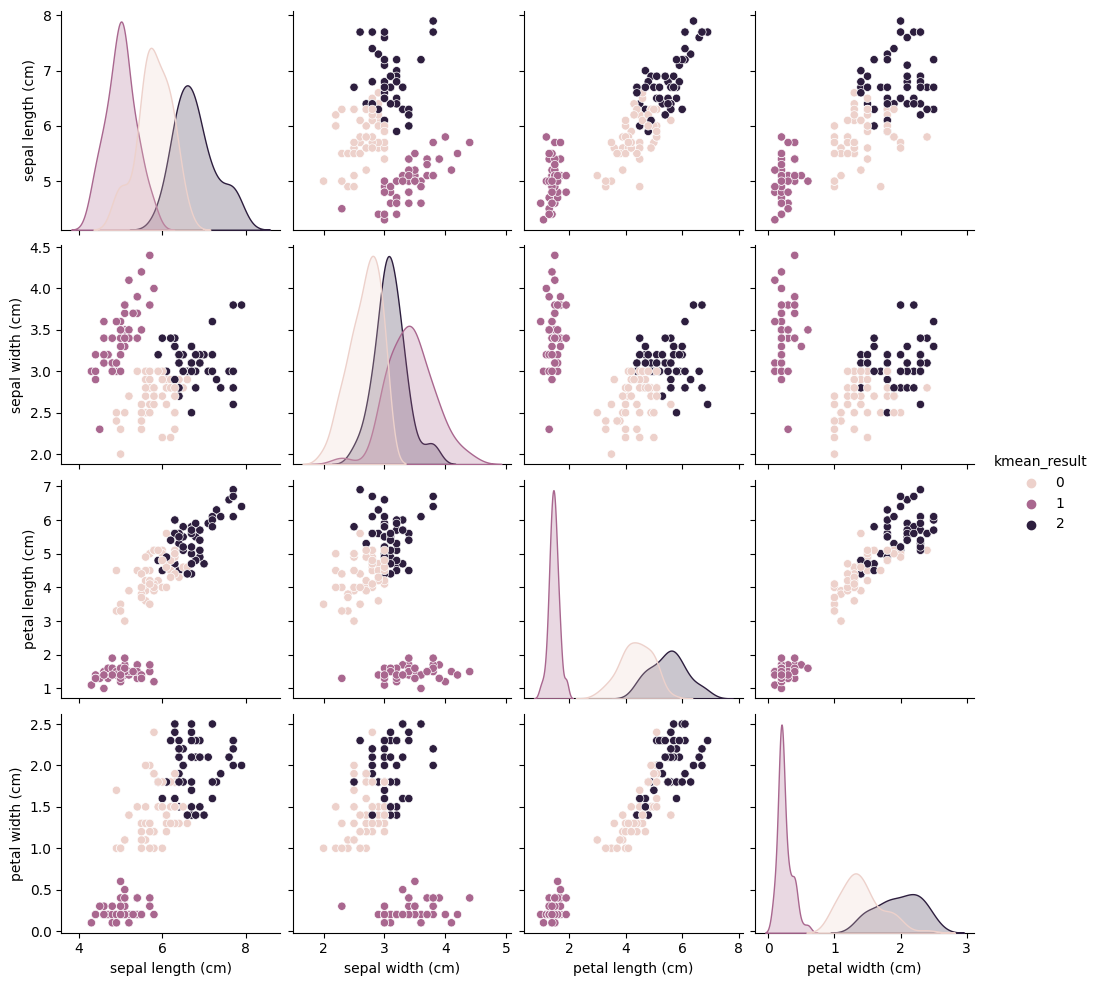

In [ ]:
## データの分布を描画
import pandas as pd
result_df = pd.concat([x, pd.DataFrame(labels, columns=['kmean_result'])], axis=1)
sns.pairplot(result_df, hue='kmean_result')

かなり分類できていそうです。

正解ラベルの方の分布も見てみます。

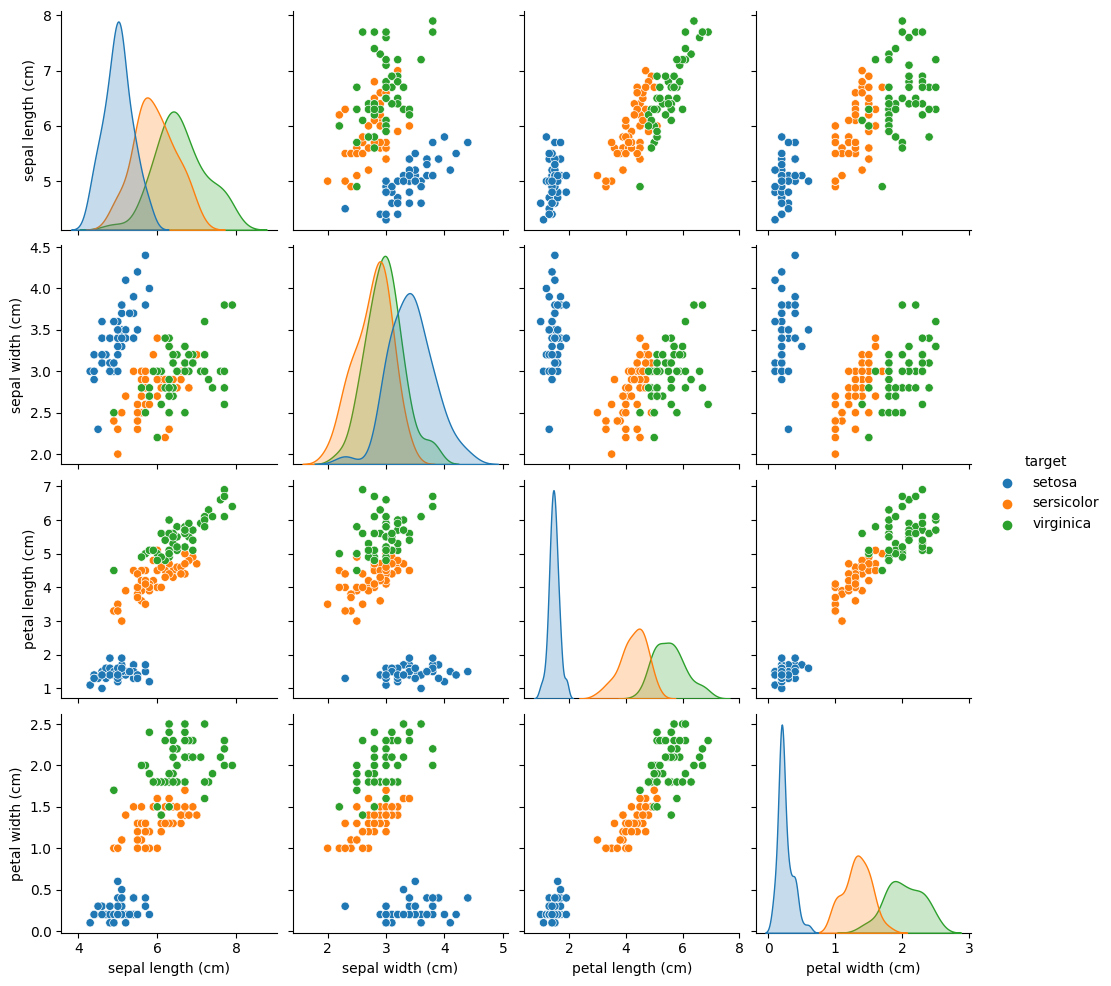

In [ ]:
# 教師付きのデータ分布
sns.pairplot(df, hue='target')

比較してもかなりいい感じにクラスタが分かれていそうです。

また、`.score()`メソッドを使って損失を計算することができます。

K(1～9)と損失を描画することで、色々なKを試してみます。


In [ ]:
losses = []

for K in range(1, 10):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(x_scaled)
    losses.append(-kmeans.score(x_scaled))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'loss')

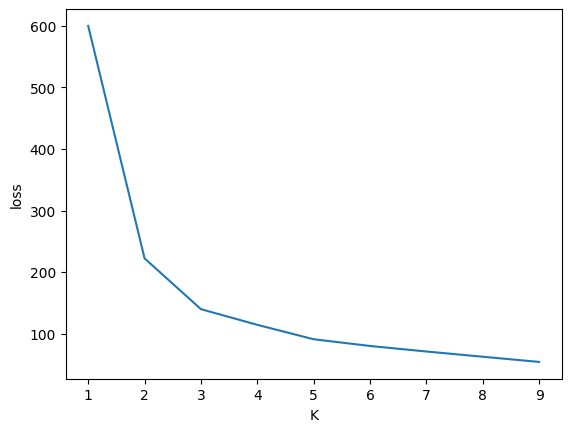

In [ ]:
plt.plot(range(1, 10), losses)
plt.xlabel('K')
plt.ylabel('loss')

K=3のときは損失がちょうどいい感じに下がっていて、  
それ以降は緩やかに損失が下がっていっているのが分かります。

### k-meansの注意点

大きな注意点は2つです。

一つは、特徴量の数が多い場合に、二組のデータ間の距離に差がなくなってくるので、  
上手くクラスタリングできなくなるという問題です（**次元の呪い**）。

このような時は、特徴量を選択したり、  
PCAで次元を削減してからk-meansを実行するといいです。

一つは、質的変数との相性が悪いという問題です。  
ダミー変数化して距離を計算しても、それが距離の意味を持ちません（0or1のみのため）。  
また、特徴量の数が増えてしまう原因にもなります。

このような時は、量的変数のみでk-meansをしたり、  
k-modesなどの別のアルゴリズムを使用するといいです。

## 階層クラスタリング

### 階層クラスタリング概要

**階層クラスタリング**（クラスター分析）は、  
k-meansと双璧をなすくらい有名なクラスタリングアルゴリズムです。

クラスタ数Kを事前に決める必要がないので、  
k-meansよりも便利なアルゴリズムであるといえます。


例えば以下のようなものが階層クラスタリングです。

（参考：https://shorturl.at/enuZ0 ）

![](https://imgur.com/5yTUS0u.png)


左のようなデータに対して階層クラスタリングを実施すると、  
右のように”階層的に”クラスタリングをしてくれます。

この右側の図のことを**dendrogram(樹状図)**といいます。  
dendrogram(樹状図)を作り”階層的に”クラスタリングするのが階層クラスタリングです。

流れは以下の図のような感じです。

（参考：https://shorturl.at/gjyV5 ）


![](https://imgur.com/aOuhj3f.png)

1. (初期設定)各データを各クラスタとする
2. 距離が最も近いクラスタ同士を融合し一つのクラスタにする
3. 2.を繰り返す
4. 最終的にクラスが一つになり終了

### dendrogramの使い方

dendrogramにおいて、縦軸の任意の箇所で”切る”ことで、  
好きなクラスタ数でのクラスタリングをすることができます。

（参考：https://shorturl.at/mW268 ）


![](https://imgur.com/LRJbjrf.png)

k-meansではあらかじめクラスタ数Kを決める必要がありましたが、  
階層クラスタリングではそれをやる必要がありません。

### 階層クラスタリングの注意点

階層クラスタリングは、クラスタの中にクラスタを作る  
いわゆる「ネスト型クラスタ」を作っています。

しかし，これは時に正しくない結果を生みます。

例えば性別×血液型のようなデータの場合を考えます。

k=2なら性別で分ける、k=4なら血液型で分ける、  
といった分け方はできないので、注意が必要です。

それぞれがネストの関係にない場合は、  
階層クラスタリングではなくk-meansなどの別のクラスタリングを使うのがベターです。

### Pythonで階層クラスタリング

Pythonで実際に階層クラスタリングしてみます。

今回は、Scikit-learnのデータセット"iris"を利用します。


（参考サイト：[こちら](https://zenn.dev/nekoallergy/articles/scikit-learn-datasets#%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E7%A8%AE%E9%A1%9E)）

"iris"のデータの説明は以下の通りです。

- 4つのデータがある
  - sepal length（がく片の長さ）
  - sepal width（がく片の幅）
  - petal length（花びらの長さ）
  - petal width（花びらの幅）
- 3種類の分類がある（それぞれ50個）
  - setosa（セトーサ、ヒオウギアヤメ）
  - versicolour（ヴァーシカラー、ブルーフラッグ）
  - virginica（ヴァージニカ、ヴァージニカ）

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df["target"][df["target"] == 0] = "setosa"
df["target"][df["target"] == 1] = "sersicolor"
df["target"][df["target"] == 2] = "virginica"

# 目的変数に"target"、説明変数にそれ以外のカラムを指定
x = df.drop('target', axis=1)
y = df['target']

<ipython-input-7-ec651b61a11a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"][df["target"] == 0] = "setosa"


今回分散を計算する関係で、事前に説明変数の標準化が必要です。


In [ ]:
# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

教師なし学習なので、今回は学習データとテストデータには分けず、全てのデータを使います。

ひとまず、`KMeans`クラスの引数`n_clusters`にクラスタ数K=3を指定してやってみます。

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(x_scaled, method='ward')
# [クラスタ1のidx, クラスタ2のidx, 距離, データ数]のリスト
# idxは，idx<len(X)ならX[idx]　idx>=len(X)ならZ[idx-len(X)]でクラスタを取得
Z[:14]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.53000000e+02, 1.72216546e

最初の方に行われているのは、データ間の融合です（データとクラスタ間の融合ではなく）。

例えば一番最初に行われているのは、101番目のデータと142番目のデータの融合です。  
距離は0となっているので、偶然全く同じデータがあったようです。

In [ ]:
print(x_scaled[101] == x_scaled[142])

[ True  True  True  True]


返ってくる数字は、以下のような特徴があります。  
今回はデータ数は150です。

- index < データ数：学習データのindex(クラスタ=データ)
- index >= データ数：linkageの戻り値のindex

14番目のデータはデータ数が3となっているため、  
クラスタとデータ間の融合であることが分かります。

ここで使ったクラスタは153番目のものです。  
どのようにしてこのクラスタができたのかは、以下のコードで確認できます。

In [ ]:
# 153番目のクラスタ
# 0番目と13番目のデータの融合
Z[153-len(x)]

array([ 0.        , 17.        ,  0.13163218,  2.        ])

では、実際にdendrogramを描画します。

truncate_mode引数およびp引数で任意の高さでdendrogramを切ります。
- truncate_mode="lastp", p=クラスタ数：指定したp個のクラスタになるようにdendrogram を切る
- truncate_model="level", p=段数：p段になるようにdendrogramを切る

図の線の先端のカッコ()内の数字はそのクラスタ内に含むデータ数です。

データ数が一つの場合は、indexが表示されます

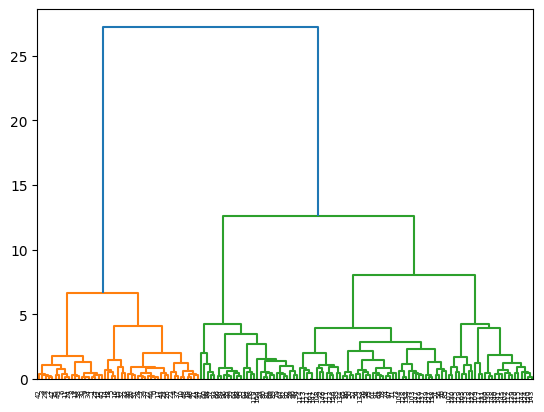

In [ ]:
d  = dendrogram(Z)

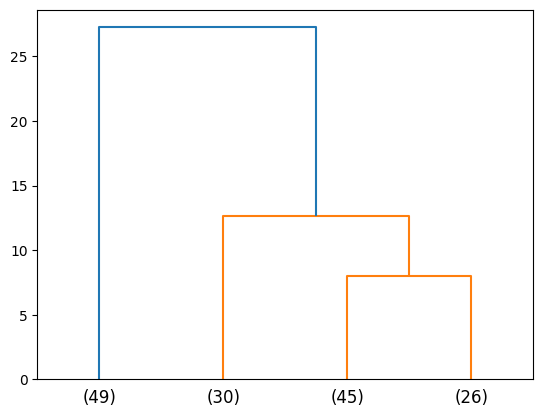

In [ ]:
# 'lastp'なので、「4個のクラスタになるように」
d = dendrogram(Z, truncate_mode='lastp', p=4)

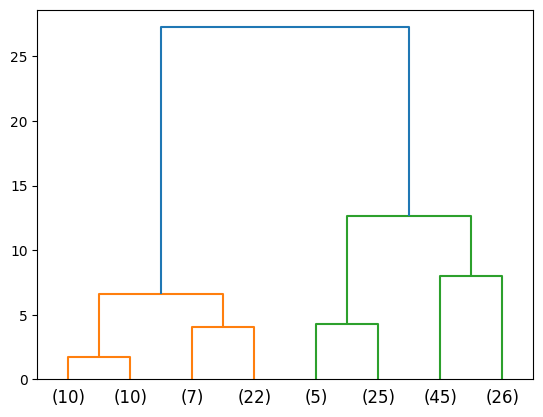

In [ ]:
# 'level'なので、「2段になるように」
d = dendrogram(Z, truncate_mode='level', p=2)

実際にどのような分類となったのか見てみます。

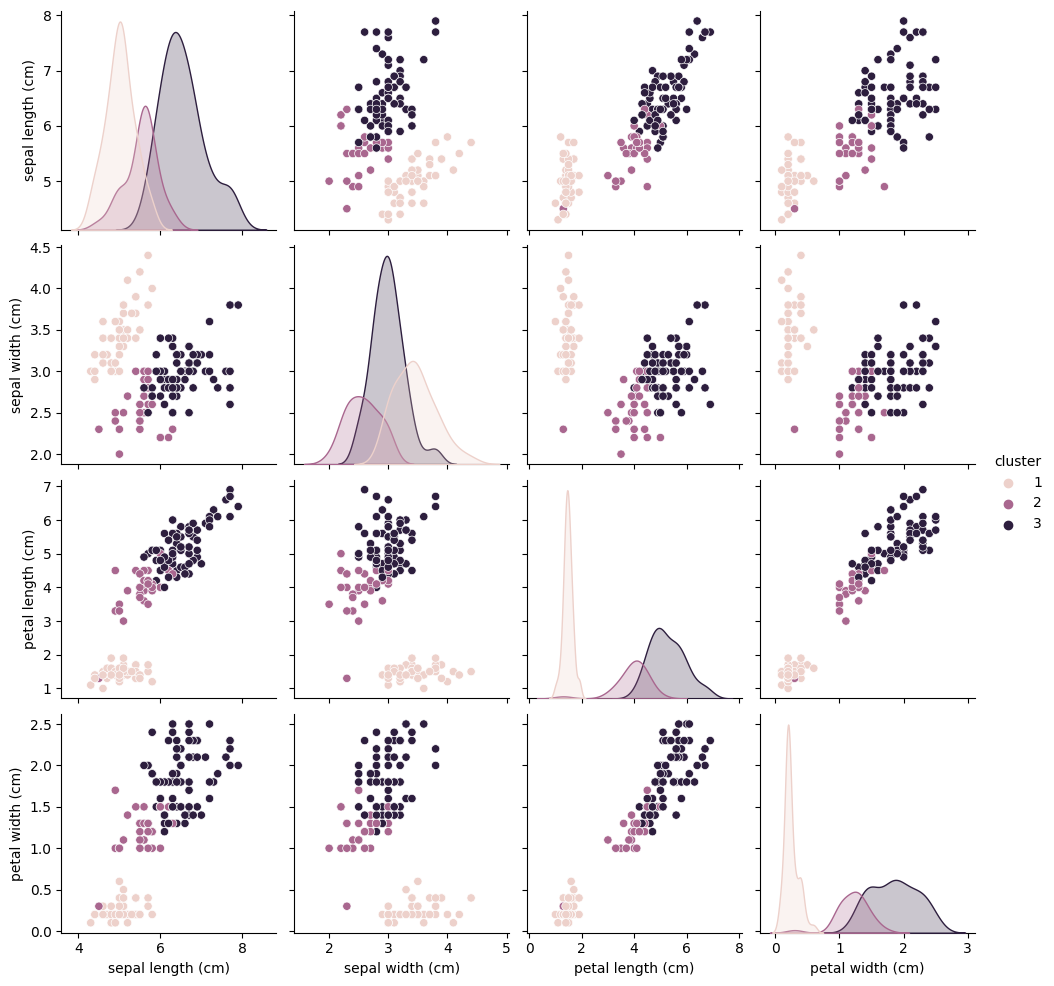

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, criterion='maxclust', t=3)

hc_result_df = pd.concat([x, pd.DataFrame({'cluster': clusters})], axis=1)
sns.pairplot(hc_result_df, hue='cluster')

かなり分類できていそうです。